# 1. La Provenance 

-Qui a la récupérer les données?

Ce décompte est effectué tous les dix ans par le Bureau de recensement des Étas-Unis, une agence gouvernementale.

-Dans quel cadre ? 

Le recensement fournit des données essentielles pouvant influer sur de nombres aspects différents de la vie. Les décideurs, les propriétaires d’entreprises, les enseignants et bien d’autres personnes utilisent ces données tous les jours pour fournir des services, des produits et un soutien à la communautéé

-Quel usage?

Nous voulons étudier les conditions qui ont des influences sur le montant du salaire, et comprendre l’impact de divers facteurs sur le salaire.



# 2. Les bias : 

1. Les biais potentiels :
Biais de quantité de saisie, biais du répontant, biais de l'enquêteur, etc.

2. Les biais propres :
-D’après les ststistiques nous remarquons que plusieurs personnes n’ont pas repondu au questionnaire de recenssement 
Et sur les types de travail (classe de travail), la profession (profession) et la nationalité (pays) ont tous des degrés divers de valeurs manquantes. Les autres indicateurs n'ont aucune valeur manquante.

# Prétraitement des données

Dans les données US-CENSUS.Il y a 32561 de donées et il y a 15 attributs(Pour savoir les détails de nos données, nous pouvovns utiliser la commande "nom.shape"et "nom.describe").

Dans les 15 attributs, il y a 6 attributs continues : 

l'âge(age), le poids de l'échantillon(final-weight), le nombre d'années de l'étucation(education-num), la recette du capital(capital-gain), la dépense du capital(capital-loss), le temps du travail par semaine(hours-per-week).

Il y a 9 attributs discrets：le type d’emploi(workclass), l’ étucation(education), l’état civil(marital-status), travail(occupation), le rôle familial (relationship), la race(race) ), la sex(sexe), la nationnalité(country), la classe du revenue(income-level).

Nous pouvons étudier l'impact de diverses variables sur le revenu et prédire le salaire par le modèle
dans les données.

Et on a trouvé que la variable "fnlwgt" n'a pas de la signifigativité dans notre modèle,donc nous voulons le supprimer dans nos données. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
adult = pd.read_csv("adult1.csv")
adult.shape

(32561, 16)

In [79]:
adult.drop(["fnlwgt"],axis=1,inplace=True)
adult.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Vérification les données manquantes :


Et puis nous voulons regarder le tableaux par python pour voir s'il y a des données pas bon(manquantes, ou les autres genres qui ont des mauvais influences au traitement ou à l'analyse avec les données) s'il en a, nous devons chercher les moyens pour supprimer ou diminuer ces influences.

Nous pouvons trouver que il y a des points d'interrogation dans les données, et il y a des influences sur le traitement des données.


In [80]:
adult

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Traitement des valeurs manquantes :

Pour savoir plus détaillement, on utilise des carrés pour représenter les indicateurs.
(Nous voulons utiliser le methode matrix de la package missingo)

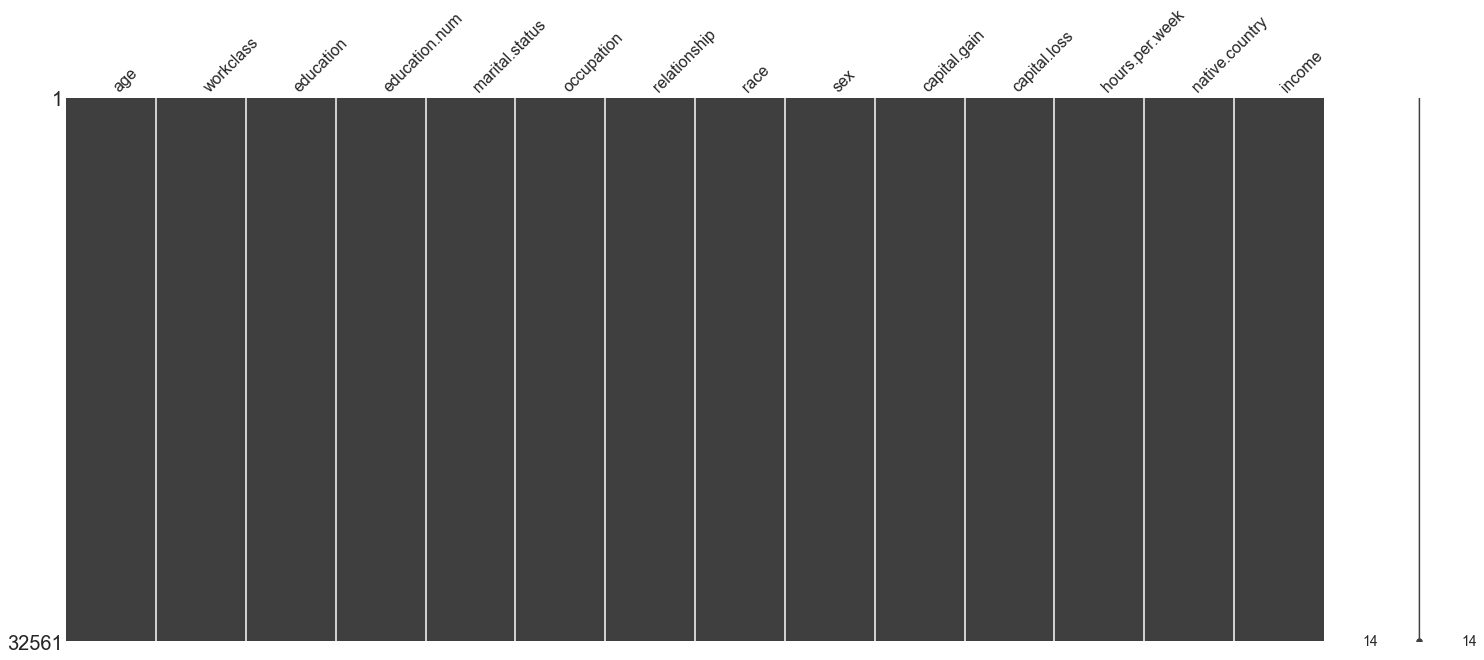

In [81]:
import missingno as migno
migno.matrix(adult)

Mais dans ce tableau, nous ne pouvons pas savoir les informations, parce qu'il montre pas les valeurs manquants.

(c'est parce que les valeurs manquants sont écrits par les points d'interrogations, et maintenant nous devons remplacer les points d'interrogation par le valeur "NaN")

In [82]:
adult.replace(to_replace='?',value=np.nan,inplace=True)
adult.describe(include='all')

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Nous pouvons savoir que mainteant on a arrivé à remplacer les points d'interrogation par "NaN",donc on va refaire la matrix.

Les blancs dans les carrés pour représenter les emplacements des données manquantes, ce qui est pratique pour observer ces données pour chaque indicateur ainsi que leurs distributions.

Il existe de nombreuses valeurs manquantes dans workclass, occupation et native.country.

On va par la suite dessiner un histogramme des valeurs manquantes. Cet histogramme compte les valeurs manquantes de chaque indicateur et affiche le nombre de valeurs manquantes de l'indicateur sous forme de graphique à barres.


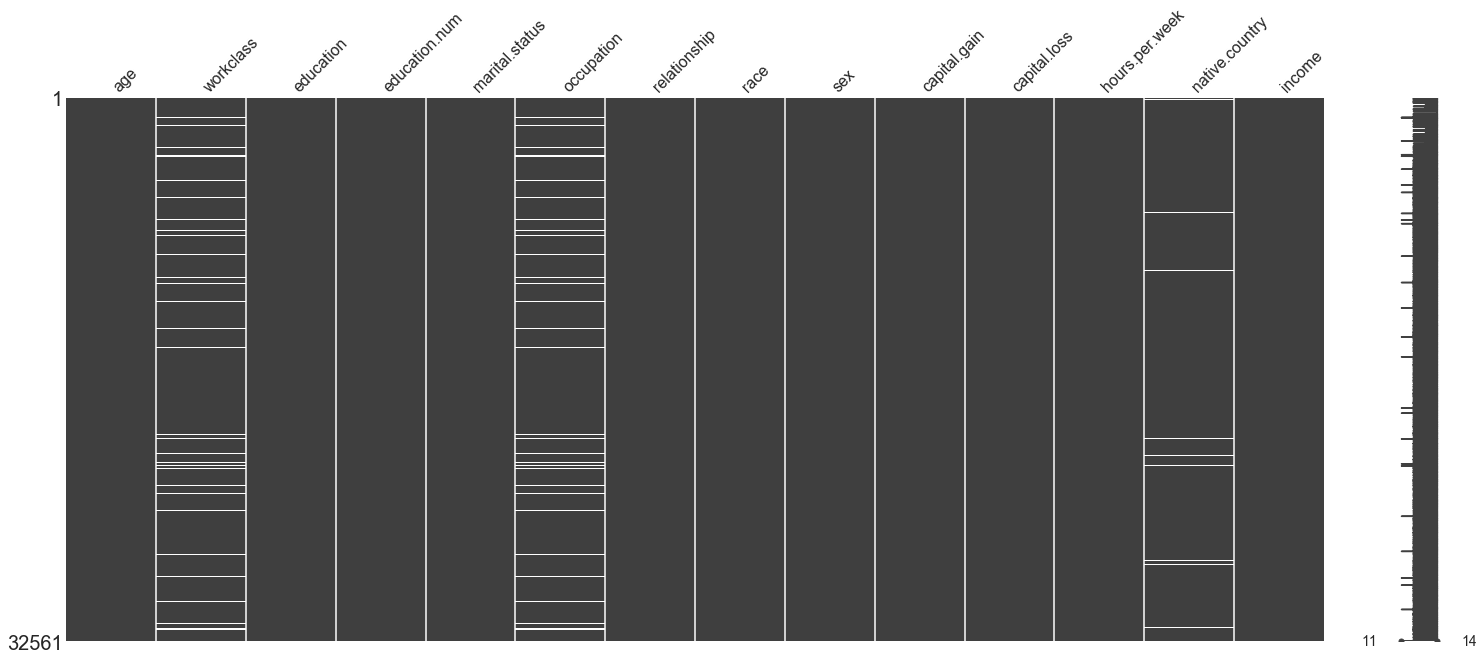

In [83]:
migno.matrix(adult)


L'histogramme montre qu'il existe différents degrés de valeurs manquantes selon occupation, workclass et native country. Les autres indicateurs ne comportent aucune valeur manquante.

Parmi eux, la variable native country comporte le plus de valeurs manquantes, suivi de workclass et de country.


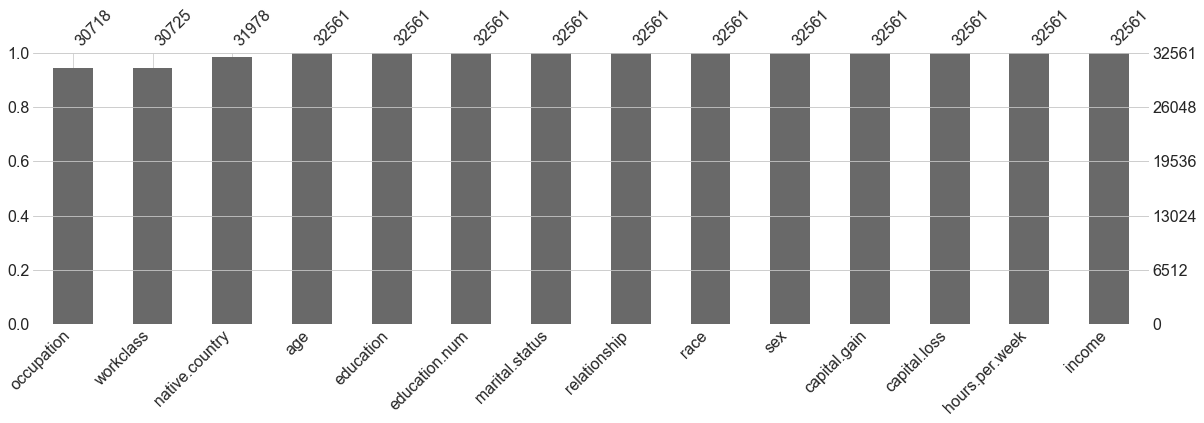

In [84]:
migno.bar(adult, sort='ascending', figsize = (20,5))  


Grâce à l'analyse des valeurs manquantes faite précédemment, nous pouvons voir que le nombre de valeurs manquantes dans l'ensemble des données est petit et que le fait d'ignorer les échantillons contenant des valeurs manquantes a peu d'impact sur les données globales. 

Nous avons donc choisi de supprimer ces valeurs manquantes.


# Ajustement des indicateurs de classification :

# Workclass 

    
Dans cet ensemble de données, il y a 8 catégories d'indicateurs de classe de travail.

Nous avons dessiné un graphique à barres pour afficher le nombre d'échantillons différents. 

Le graphique à barres ci-dessous montre que les emplois privés représentent un pourcentage relativement important de l'échantillon, 
tandis que le nombre d'emplois non actifs et non rémunérés sont extrêmement faible. Sur la base de la situation réelle, ils sont classés en cinq catégories.


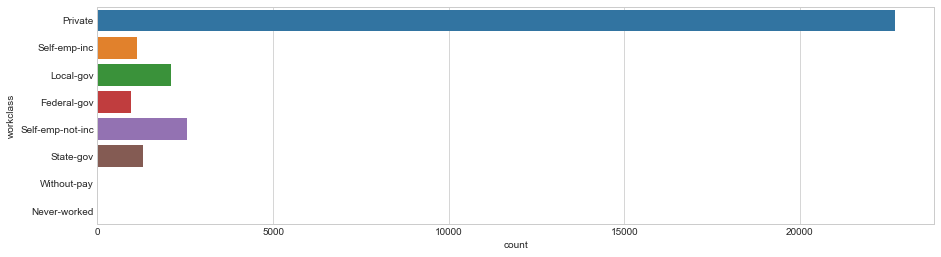

In [8]:
import seaborn as sns
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15, 4))   
sns.countplot(y="workclass", data=adult)

# Occupation :

Il existe 14 types de professions dans cet ensemble de données:

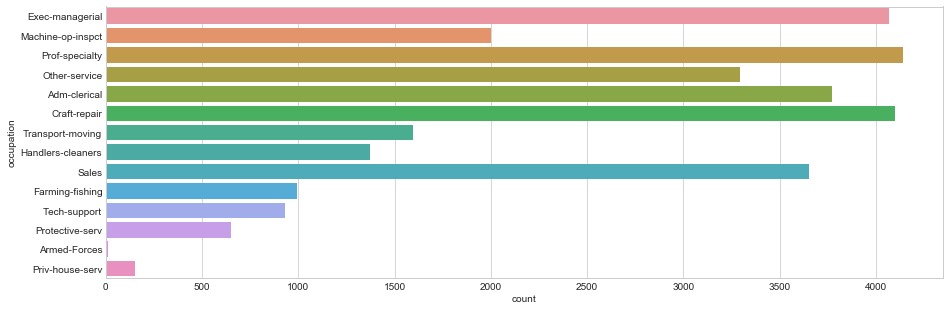

In [86]:
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15,5))   
sns.countplot(y="occupation", data=adult)


À cause des plusieurs attributs dans la variable 'occupation' donc nous voulons refaire la classification pour cette variable.

Nous voulons simplifier la variable emploi aussi par 6 classes : Admin, Military,Manual Labour, Office Labour, Service, Professional.


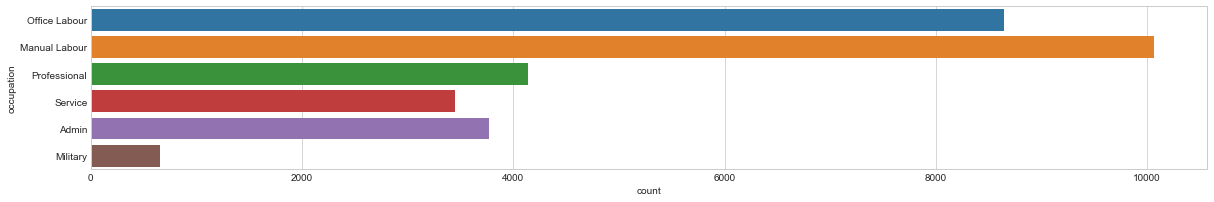

In [87]:
adult.loc[adult['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'  
adult.loc[adult['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'    
adult.loc[adult['occupation'] == 'Protective-serv', 'occupation'] = 'Military'  
adult.loc[adult['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'  
adult.loc[adult['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'    
adult.loc[adult['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'    
adult.loc[adult['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'   
adult.loc[adult['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'   
adult.loc[adult['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'  
adult.loc[adult['occupation'] == 'Sales', 'occupation'] = 'Office Labour'   
adult.loc[adult['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'    
adult.loc[adult['occupation'] == 'Other-service', 'occupation'] = 'Service'
adult.loc[adult['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service' 
adult.loc[adult['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'  
  
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(20,3))  
sns.countplot(y="occupation", data=adult)


# Niveau d’éducation 

Le graphique ci-dessous montre qu'il existe jusqu'à 16 catégories de niveau d'éducation. 

En générant un graphique à barres, on peut voir que le nombre de catégories à faible niveau d'éducation est relativement faible.

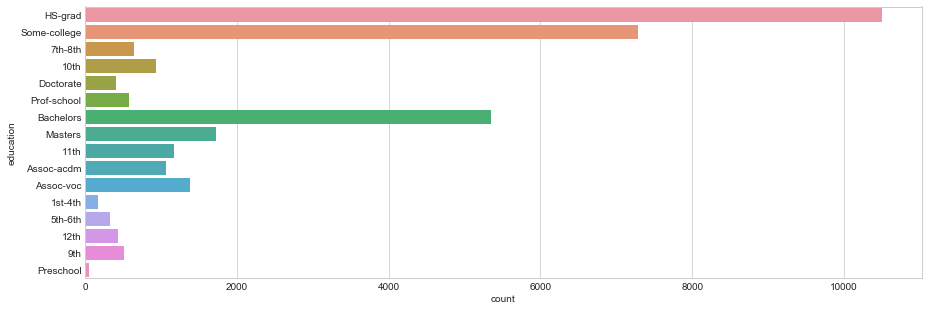

In [88]:
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15,5))   
sns.countplot(y="education", data=adult)

Nous voulons simplifier la variable éducation par 8 classes : Bachelors, Professor, Doctorate, Master, Dropout, HS-grad, HS-graduate, Associate.

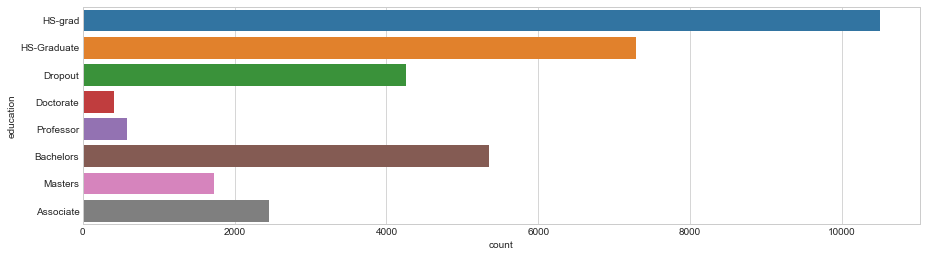

In [89]:
adult.loc[adult['education'] == 'Preschool', 'education'] = 'Dropout'   
adult.loc[adult['education'] == '1st-4th', 'education'] = 'Dropout'
adult.loc[adult['education'] == '5th-6th', 'education'] = 'Dropout'   
adult.loc[adult['education'] == '7th-8th', 'education'] = 'Dropout'   
adult.loc[adult['education'] == '9th', 'education'] = 'Dropout'    
adult.loc[adult['education'] == '10th', 'education'] = 'Dropout'  
adult.loc[adult['education'] == '11th', 'education'] = 'Dropout'   
adult.loc[adult['education'] == '12th', 'education'] = 'Dropout'   
adult.loc[adult['education'] == 'Assoc-acdm', 'education'] = 'Associate'  
adult.loc[adult['education'] == 'Assoc-voc', 'education'] = 'Associate'  
adult.loc[adult['education'] == 'HS-Grad', 'education'] = 'HS-Graduate'    
adult.loc[adult['education'] == 'Some-college', 'education'] = 'HS-Graduate'    
adult.loc[adult['education'] == 'Prof-school', 'education'] = 'Professor'    
adult.loc[adult['education'] == 'Bachelors', 'education'] = 'Bachelors'    
adult.loc[adult['education'] == 'Masters', 'education'] = 'Masters'    
adult.loc[adult['education'] == 'Doctorate', 'education'] = 'Doctorate'    
  
plt.style.use('seaborn-whitegrid')  
fig = plt.figure(figsize=(15,4))   
sns.countplot(y="education", data=adult)

# Marital statu :

On peut remarquer qu’il y’a plus de personnes mariées suivi par jamais marié et par divorcé.

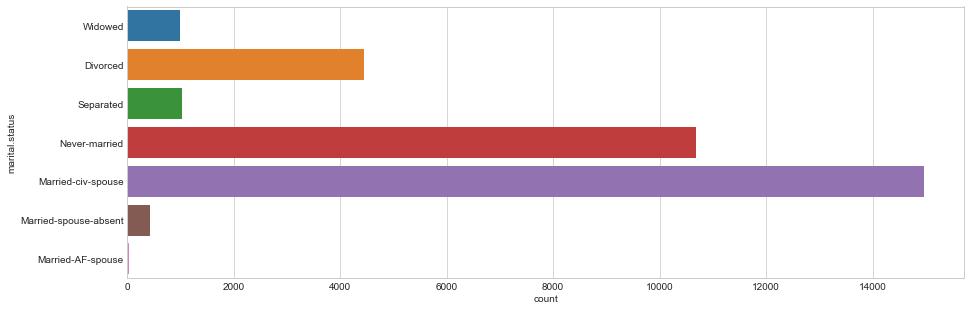

In [90]:
plt.style.use('seaborn-whitegrid')  
plt.figure(figsize=(15,5))   
sns.countplot(y="marital.status", data=adult)


Nous avons par la suite divisé la variable âge afin d'avoir une meilleure analyse et nous avons dessiné un graphique pour montrer la corrélation entre la variable âge et éducation :

Nous observons plusieurs types dans certaines variables (ensemble données).

Par exemple pour la variable âge : si on veut l'étudier, nous aurons beaucoup de valeurs dans l'axe X, donc pour laisser ces valeurs en axes des X et avoir une présentation plus lisible on l'a divisé comme ceci, Nous écrivons une fonction ‘age1’ pour regrouper l'âge par 6 groupes.

Nous écrivons une fonction "age1" pour regrouper l'âge par 6 groupes.


In [91]:
def age1(x):

    if 60 < x:
        return 'sup 60'
    elif 50 < x <= 60:
        return'50 à 60'
    elif 40 < x <= 50:
        return '40 à 50'
    elif 30 < x <= 40:
        return '30 à 40'
    elif 20 < x <= 30:
        return '20 à 30'
    else:
        return 'inf 20'
   
adult['age1']=adult.loc[:,'age'].apply(lambda x:age1(x),)
adult['age1']

0         sup 60
1         sup 60
2         sup 60
3        50 à 60
4        40 à 50
          ...   
32556    20 à 30
32557    20 à 30
32558    30 à 40
32559    50 à 60
32560    20 à 30
Name: age1, Length: 32561, dtype: object

Nous utilisons le méthode factorplot du package seaborn pour connaitre la distribution de la variable éducation sur l'âge.

Avec ce graphique nous pouvons remarquer que l’intervalle lycée (Hs-grad) occupe une partie très importante. Mais, concernant les personnes ayant moins de 20 ans, le nombre de personnes qui n’ont pas de diplôme universitaire(Some-college) est supérieur au nombre de personne qui ont un diplôme lycée. 

Et nous pouvons aussi dire que la distribution de ‘Hs-grad’ suit une loi normale sur ce graphique.


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


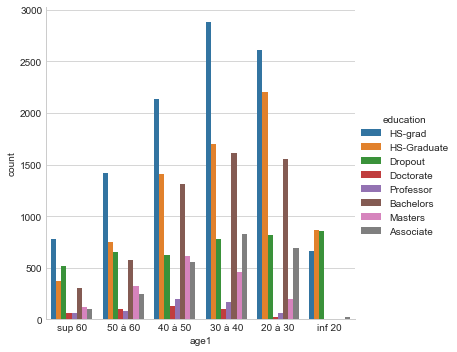

In [92]:
sns.factorplot("age1",data=adult,kind="count",hue="education")

Par la suite, nous avons étudié la relation entre l'age et l'état civil en suivant la même méthode précédemment évoquée.

Avec ce graphique-là, nous pouvons remarquer que les personnes de plus de 20 ans sont majoritairement (Married-civ-spousse). Cependant, la distribution (divorced) suit presque une loi normale. 

Concernant les personnes de plus de 20 ans, le pourcentage de (Never-married) diminue et ( Separated) diminue en fonction de l'augmentation de l'âge.


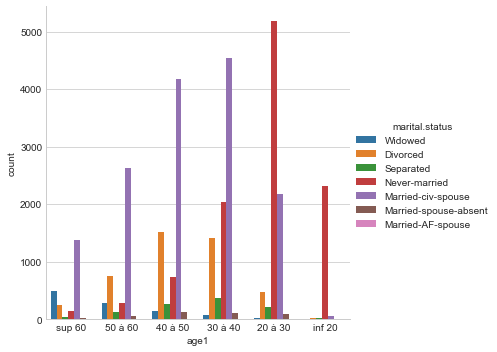

In [93]:
sns.factorplot("age1",data=adult,kind="count",hue="marital.status")

Nous voulons aussi étudier la relation entre le revenu et le sexe :

Nous remarquons que les hommes gagnent plus que les femmes dans les deux cas <=50k et >50k, et la proportion de l'homme sur les gens qui gagnent plus de 50K$ est supérieur que la proportion de la femme.


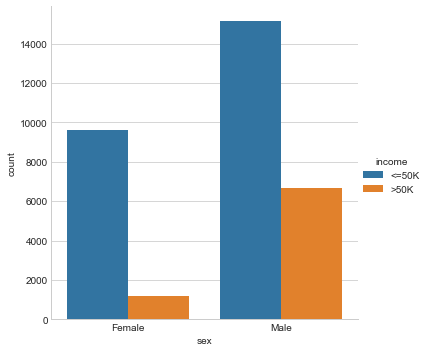

In [94]:
sns.factorplot("sex",data=adult,kind="count",hue="income")


La corrélation entre la variable age et la variable sexe

Pour les personnes qui ont moins de 20 ans, le pourcentage des hommes et des femmes sont presque similaire. 

Pour les personnes de plus de 20 ans, la proportion des femme est significativement supérieur à celle des hommes.


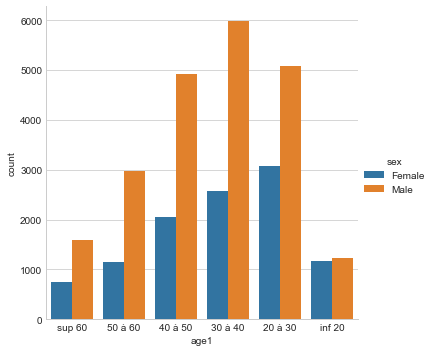

In [95]:
sns.factorplot('age1', data=adult, kind='count',hue='sex')


La relation entre l'âge et l'occupation


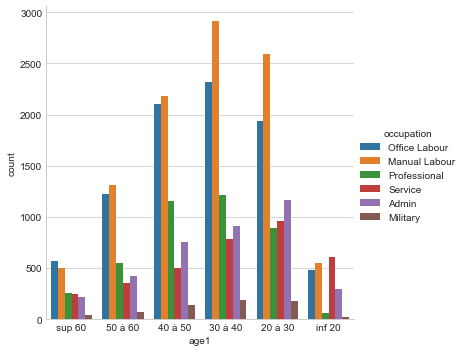

In [96]:
sns.factorplot("age1",data=adult,kind="count",hue="occupation")


Nous étudions la relation entre les deux variables race et income :

Nous pouvons dire que peu importe la race, la proportion des gens qui gagnent <= 50,000$ est très importante. Mais, la race blanche qui gagnent >50,000 est nettement supérieur à celle de la race noire.


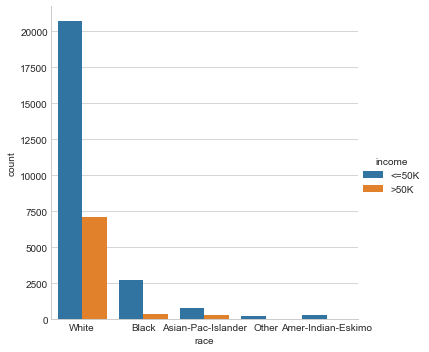

In [97]:
sns.factorplot("race",data=adult,kind="count",hue="income")


Enfin, nous voulons étudier la corrélation entre l'éducation et la revenue.


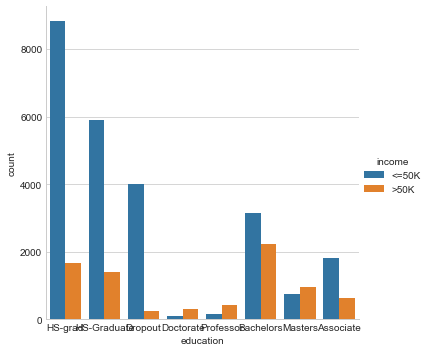

In [98]:
sns.factorplot("education",data=adult,kind="count",hue="income")


Nous avons par la suite trouvé que nous pouvons connaître le capital total grâce aux variables "capital gain" et "capital loss".
 « Capital-total» = « Capital-gain » - « capital-loss »
 

In [2]:
import pandas as pd
adult['capital.total'] = adult['capital.gain'] - adult['capital.loss']
adult[['capital.gain', 'capital.loss', 'capital.total']] = adult[['capital.gain', 'capital.loss', 'capital.total']].astype('int')
adult = adult.sort_values(by='capital.total', ascending=False)
 
adult.to_csv('adult1.csv', index=False)



# La relation entre la variable dépendante et les autres variables explicatives 


D’abord, nous voulons agréger les données pour regarder la distribution selon les classes.

Pour income (income <=50K et income >50K):

on voit que les gens qui gagnent moins que 50K dollars sont la plupart (trois quarts), ce qui implique dans les Etats-Unis la plupart de gens sont de la classe moyenne. Des gens qui ont de salaire élevé (un quart) sont la minorité. Le jeu n'est pas équilibré.

In [3]:
adult.loc[:,['income','occupation']].groupby(by='income').count()

,occupation
income,
<=50K,23068
>50K,7650



En suite,nous voulons trouver le lien entre le revenue et les autres variable qui sont présentées par les chiffres avec la moyenne.


In [4]:
adult.groupby(by='income').mean()

,age,education.num,capital.gain,capital.loss,hours.per.week,capital.total
income,,,,,,
<=50K,36.783738,9.595065,148.752468,53.142921,38.840210,95.609547
>50K,44.249841,11.611657,4006.142456,195.001530,45.473026,3811.140926



Pour l'âge moyenne, celui des gens qui gagnent moins de 50K dollars est environ 37 ans, et 7 ans plus jeune que des gens qui gagnent plus que 50K dollars. On peut déduire que des gens âgés sont souvent plus expérimentés, ainsi ils gagnent plus que des gens jeunes.

Pour le nombre de l’éducation moyenne, on a observé que des gens qui ont de salaire plus que 50K dollars ont un niveau d'éducation plus élevé. Ainsi on déduit que si on reçoit un niveau d’éducation plus élevé, on a plus grande possibilité d’avoir plus de salaire.

Pour le "capital gain" moyen et le "capital loss" moyen, on voit que ceux qui gagnent plus que 50K dollars ont capital gain beaucoup plus grand que ceux qui gagnent moins, et ont "capital loss" juste tout petit peu plus grand que ceux qui gagnent moins. Alors ceux qui gagnent plus que 50K dollars ont le capital total, la différence entre le gain en capital et la perte en capital, beaucoup plus grand. Lorsque on vend une immobilisation, la différence entre la base ajustée de l’actif et le montant que on a réalisé de la vente est un gain en capital ou une perte en capital. On subbit une perte en capital si on vend l’actif à un prix inférieur à notre base ajustée. Donc le "capital total" plus grand, veut dire la capacité de produire le bénéfice plus grande, ainsi on gagne plus. Et on plus on a observé que le capital total plus grand grâce au gain en capital beaucoup plus grand, mais pas la perte en capital plus petite.

Pour les heures par semaine moyennes, ceux qui gagnent plus de 50K dollars travaillent 7 heures de plus comparent avec ceux qui gagnent moins. On peut ainsi renverser la théorie que Des gens qui sont les plus assidus gagnent souvent moins que ceux qui travaille pas du tout. On voit que c’est sûr si on veut gagner plus, il faut jamais penser on peut travailler moins que les autres. Tout s’est pas basé dans une seule journée.





Puis on regarde la statistique par l'âge:


In [4]:
adult.groupby(by = 'age1').mean()

,age,education.num,capital.gain,capital.loss,hours.per.week,capital.total
age1,,,,,,
20 à 30,25.598628,10.087846,377.601201,52.807523,39.570938,324.793678
30 à 40,35.427919,10.355371,1028.831032,92.860520,43.272525,935.970513
40 à 50,45.181011,10.549048,1674.111986,117.363168,43.382787,1556.748819
50 à 60,55.000727,9.936289,1753.673450,111.335514,42.363857,1642.337936
inf 20,18.756432,8.557676,94.343568,40.339834,28.565145,54.003734
sup 60,67.242281,9.475986,1740.178816,103.662093,33.120497,1636.516724


Pour les nombres d’éducation moyen, âge de 20-50 ont plus de 10 ; Parmi eux, âge de 40-50 ont le niveau d’éducation le plus élevé. On peut déduire que des gens qui ont moins que 40 sont souvent ceux qui ne sont pas encore fini leurs études entières ; des gens qui ont plus que 50 sont souvent ceux qui n’ont pas encore accepté le niveau d’éducation élevé à ce moment là.

Pour le capital total moyen, âge supérieur à 30 ont souvent de capital total plus que 1000, et on voit que avec l’augmentation de l’âge, on a de plus en plus de capital total, jusqu’à 60. Ainsi on peut déduire que quand l’âge croît, on obtient plus de l’expérience par le travail, on a la chance plus grande d’obtenir le bénéfice, donc on a plus de capital total, cette tendance reste jusqu’à 60 ans, car on vieillit et peut pas réfléchir aussi clair que les plus jeunes.

Pour les heures par semaine moyennes, on a l’âge de 30-60 qui travaillent plus que 40 heures par semaine, et aussi parmi eux, l’âge de 40-50 travaillent le plus longtemps par semaine.

A travers ces deux tables, c’est pas difficile que on déduit des gens qui ont 40-50 ans a plus grande possibilité de gagner plus de 50K dollars, car ils ont capital total le plus grand, les heures par semaine les plus grandes et le niveau d’éducation plus grand, conformément à la figure précédente qu’on a étudié dans la séance 3 :


In [6]:
adult.loc[:,['income','education','sex']].groupby(by = ['income','education']).count()

sex
income education        
<=50K  Associate    1823
       Bachelors    3134
       Doctorate     107
       Dropout      4009
       HS-Graduate  5904
       HS-grad      8826
       Masters       764
       Professor     153
>50K   Associate     626
       Bachelors    2221
       Doctorate     306
       Dropout       244
       HS-Graduate  1387
       HS-grad      1675
       Masters       959
       Professor     423

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


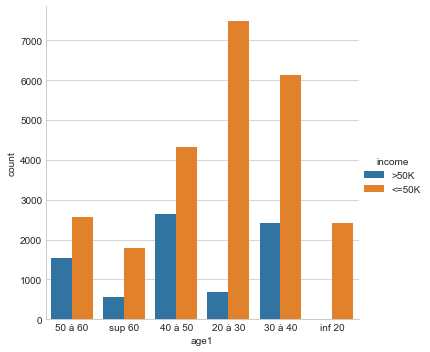

In [9]:
sns.factorplot('age1', data = adult, kind = 'count', hue = 'income')

Dans cette graphique, on voit que l’âge de 50-60 est la deuxième qui peut gagner probablement plus de 50K dollars, mais selon la table précédente, les nombres d’éducation et les heures par semaines de ceux qui ont 50-60 ans sont moins que ceux qui ont 30-40 ans (qui ont la troisième grande possibilité de gagner plus de 50K dollars), mais quand même plus grand que les autres âges pour les heures par semaine, et moins que 20-30 ans aussi pour le niveau d’éducation. Donc on a une conclusion maintenant : Le facteur le plus crucial pour le salaire est le capital total, et puis les heures par semaine, ensuite le niveau d’éducation. (Si on juste regarde ces variables numériques)

Maintenant, on découpe les données en jeu de test/apprentissage/validation. On d’abord coupe les données en jeu d’apprentissage et jeu de test, et après c’est le découpage du jeu de test en jeu de validation et jeu de test (on va utiliser le methode 'train_test_split' du package sklearn.model_selection et le package 'sklearn.datasets'):

Maintenant, nous voulons faire la découpage entre les variables explicatives et la variable expliquée. 

Sur ce modèle, nous voulons étudier les influences de la revenue, donc ici la variable expliquée est 'income' et les autres variables 

sont les variables expliquées.
Il faut faire la découpage dans le jeu d'apprentissage, la découpage dans le jeu de test, la découpage dans le jeu de validation.


Séparer les variables explicatives (X) de la variable à expliquer (Y)

Pour le Y ne prendre que l'attribut "income".


In [3]:
from sklearn.model_selection import train_test_split 
import sklearn.datasets as sk_d
import sklearn.model_selection as sk_ms
import pandas as pd
adult = pd.read_csv("adult1.csv")

In [4]:
adult = adult.copy() 
adult['age1'] = adult['age1'].factorize()[0]
adult['workclass'] = adult['workclass'].factorize()[0]  
adult['education'] = adult['education'].factorize()[0]  
adult['marital.status'] = adult['marital.status'].factorize()[0]  
adult['occupation'] = adult['occupation'].factorize()[0]  
adult['relationship'] = adult['relationship'].factorize()[0]  
adult['race'] = adult['race'].factorize()[0]  
adult['sex'] = adult['sex'].factorize()[0]  
adult['native.country'] = adult['native.country'].factorize()[0]  
adult['income'] = adult['income'].factorize()[0] 

### la découpage des données 

In [5]:
y_data=adult['income']  
x_data=adult.drop(['income'],axis=1)

Nous utilisons le train_test_split() de sk.learn pour découper les données.

L'ensemble de données est divisé en ensemble d'apprentissage et ensemble de test. L'ensemble de test occupe 20% de l'ensemble de données complet et l'ensemble d'apprentissage occupe 80% de l'ensemble de données.

Et en fonction de la proportion de chaque catégorie dans la variable dépendante, les variables de l'ensemble d'apprentissage x_train, y_train et les variables de l'ensemble de test x_test, y_test sont obtenues.


In [6]:
x_val,x_test,y_val,y_test = train_test_split(  
    x_data,  
    y_data,  
    test_size=0.5,  
    random_state=1,  
    stratify=y_data)  

## Passer les variables catégorielles à des données binaires 

In [7]:
pd.get_dummies(adult.loc[:,'occupation'])


,-1,0,1,2,3,4,5
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0
32558,1,0,0,0,0,0,0
32559,0,1,0,0,0,0,0


In [8]:
pd.get_dummies(adult.loc[:,'education'])

,0,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0
32557,0,0,0,0,0,0,0,1
32558,0,0,1,0,0,0,0,0
32559,0,1,0,0,0,0,0,0


In [9]:
pd.get_dummies(adult.loc[:,'marital.status'])

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0
32557,0,1,0,0,0,0,0
32558,0,0,0,0,1,0,0
32559,0,0,0,0,1,0,0


In [10]:
pd.get_dummies(adult.loc[:,'relationship'])

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32556,0,0,0,0,1,0
32557,0,0,1,0,0,0
32558,0,0,1,0,0,0
32559,0,1,0,0,0,0


In [11]:
pd.get_dummies(adult.loc[:,'race'])

,0,1,2,3,4
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
32556,1,0,0,0,0
32557,1,0,0,0,0
32558,0,0,1,0,0
32559,1,0,0,0,0


In [12]:
pd.get_dummies(adult.loc[:,'sex'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32556,0,1
32557,0,1
32558,0,1
32559,0,1


In [13]:
pd.get_dummies(adult.loc[:,'native.country'])

,-1,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modélisation

Nous avons fait 3 modèles pour estimer ces données : Naive Bayes, KNN, Decision Tree

Nous avons crée une méthode de formation pour les modèles. 

En utilisant cette méthode, nous pouvons transmettre le modèle qui a le hyperparamètre, l'ensemble d'apprentissage, l'ensemble de test et le valeur du pli de la validation croisée K-fold cv.

Utilisons ensuite l'ensemble d'apprentissage pour entraîner le modèle et obtenons test_pred en utilisant le modèle entraîné pour prédire x_test.

Et calculons la probabilité d'échantillons appartenant à différentes catégories grâce à predict_proba.

Continuons à utiliser la valitation croisé K-fold pour entraîner à nouveau modèle et renvoyons les résultats de la formation et les indicateurs d'évaluation du modèle.

In [14]:
def fit_ml_algo(algo, x_val, y_val, x_test, cv):  
    model = algo.fit(x_val, y_val)  
    test_pred = model.predict(x_test)  
    try:  
        probs = model.predict_proba(x_test)[:,1]  
    except Exception as e:  
        probs = "Unavailable"  
        print('Warning: Probs unavaliable.')  
        print('Reason: ', e)  
          
      
    acc = round(model.score(x_val, y_val) * 100, 2)   
    # CV   
    train_pred = model_selection.cross_val_predict(algo,   
                                                  x_val,   
                                                  y_val,   
                                                  cv=cv,   
                                                  n_jobs = -1)  
    acc_cv = round(metrics.accuracy_score(y_val, train_pred) * 100, 2)  
    return train_pred, test_pred, acc, acc_cv, probs  

Pour créer une méthode de rapport pour la construction d'hyperparamètres.

Nous utilsons ici le moyen de RandomizedSearchCV() pour choisir les mieux hyperparamètres. 

Par rapport une autre méthode GridSearchCV(), le moyen qu'on a choisi prend peu de temps, c'est parce que le moyen qu'on utilise ne va pas estimer tout les parametre   

In [15]:
def report(results, n_top=5):  
    for i in range(1, n_top + 1):  
        candidates = np.flatnonzero(results['rank_test_score'] == i)  
        for candidate in candidates:  
            print("Model with rank: {0}".format(i))  
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(  
                  results['mean_test_score'][candidate],  
                  results['std_test_score'][candidate]))  
            print("Parameters: {0}\n".format(results['params'][candidate]))

Créer une méthode pour calculer TPR(True positive Rate) et FPR(False Positive Rate) et déssiner la courbe ROC à la fois.

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 
def plot_roc_curve(y_test, preds):  
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)  
    roc_auc = metrics.auc(fpr, tpr)  
    plt.title('ROC')  
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)  
    plt.legend(loc = 'lower right')  
    plt.plot([0, 1], [0, 1],'r--')  
    plt.xlim([-0.01, 1.01])  
    plt.ylim([-0.01, 1.01])  
    plt.ylabel('TPR')  
    plt.xlabel('FPR')  
    plt.show()  

## Native Bayes

In [17]:
import time,datetime
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection,metrics
start_time = time.time()  
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau\
= fit_ml_algo(GaussianNB(),   
              x_val,   
              y_val,   
              x_test,   
              10)  
gaussian_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_gaussian)  
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)  
print("Running Time: %s s" % datetime.timedelta(seconds=gaussian_time).seconds) 

Accuracy: 79.64
Accuracy CV 10-Fold: 79.66
Running Time: 3 s


La précision de prédiction du modèleatteint 79.64%.

La prédiction de la validation croisée décuplée est de 79.66%.

Le temps de calcul est 3 seconde.

Performance de l'ensemble de la validation 

In [18]:
print(metrics.classification_report(y_val, train_pred_gaussian))  

              precision    recall  f1-score   support

           0       0.67      0.30      0.42      3920
           1       0.81      0.95      0.88     12360

    accuracy                           0.80     16280
   macro avg       0.74      0.63      0.65     16280
weighted avg       0.78      0.80      0.77     16280



Performances de l'ensemble de test

In [19]:
print(metrics.classification_report(y_test, test_pred_gaussian))   

              precision    recall  f1-score   support

           0       0.69      0.32      0.44      3921
           1       0.82      0.95      0.88     12360

    accuracy                           0.80     16281
   macro avg       0.75      0.64      0.66     16281
weighted avg       0.79      0.80      0.77     16281



La courbe ROC de Naive Bayes

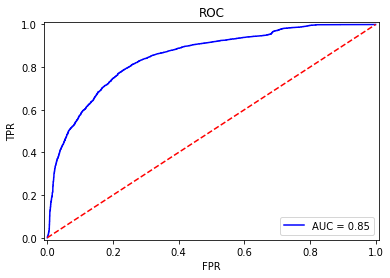

In [20]:
plot_roc_curve(y_test,probs_gau) 

## K-NN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()  
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn\
= fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,  
                                   n_jobs = -1),   
                                   x_val,   
                                   y_val,   
                                   x_test,   
                                   10)  
knn_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_knn)  
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)  
print("Running Time: %s s" % datetime.timedelta(seconds=knn_time))  

Accuracy: 90.21
Accuracy CV 10-Fold: 82.71
Running Time: 0:00:10.506866 s


La précision de prédiction du modèleatteint 90.21%.

La prédiction de la validation croisée décuplée est de 82.71%.

Performance de l'ensemble de la validation 

In [22]:
print(metrics.classification_report(y_val,train_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62      3920
           1       0.88      0.90      0.89     12360

    accuracy                           0.83     16280
   macro avg       0.77      0.75      0.76     16280
weighted avg       0.82      0.83      0.82     16280



Performances de l'ensemble de test

In [23]:
print(metrics.classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      3921
           1       0.88      0.91      0.89     12360

    accuracy                           0.84     16281
   macro avg       0.78      0.76      0.77     16281
weighted avg       0.83      0.84      0.83     16281



La courbe ROC de KNN

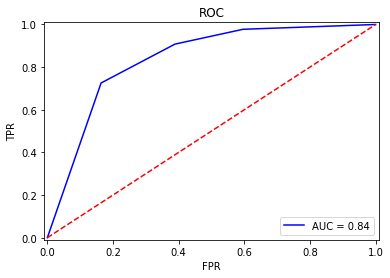

In [33]:
plot_roc_curve(y_test,probs_knn)

## L'arbre de décision

In [25]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()  
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt\
= fit_ml_algo(DecisionTreeClassifier(),   
              x_val,   
              y_val,   
              x_test,   
              10)  
dt_time = (time.time() - start_time)  
print("Accuracy: %s" % acc_dt)  
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)  
print("Running Time: %s s" % datetime.timedelta(seconds=dt_time).seconds)

Accuracy: 97.58
Accuracy CV 10-Fold: 80.9
Running Time: 0 s


La précision de prédiction du modèleatteint 97.58%.

La prédiction de la validation croisée décuplée est de 80.93%.

Le temps de calcul est 0s.

La performance de l'ensemble d'entrainement

In [26]:
print(metrics.classification_report(y_val,train_pred_dt))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      3920
           1       0.88      0.87      0.87     12360

    accuracy                           0.81     16280
   macro avg       0.74      0.75      0.74     16280
weighted avg       0.81      0.81      0.81     16280



La performance de l'ensemble test

In [27]:
print(metrics.classification_report(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      3921
           1       0.88      0.87      0.88     12360

    accuracy                           0.81     16281
   macro avg       0.75      0.75      0.75     16281
weighted avg       0.82      0.81      0.82     16281



La graphique d'arbre décision

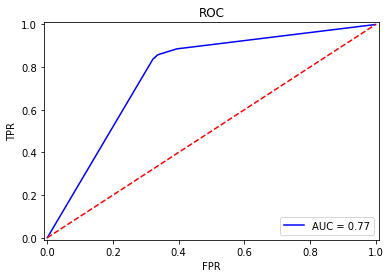

In [37]:
plot_roc_curve(y_test,probs_dt)

Nous voulons utiliser le valeur de Accuracy, Présision, Recall, et F1 comme les indicateurs.


In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score
models = pd.DataFrame({  
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree'],  
    'Acc': [  acc_knn, acc_gaussian,  acc_dt],  
    'Acc_cv': [ acc_cv_knn,acc_cv_gaussian, acc_cv_dt],  
    'precision': [  
        round(precision_score(y_test,test_pred_knn), 3),    
        round(precision_score(y_test,test_pred_gaussian), 3),  
        round(precision_score(y_test,test_pred_dt), 3)
                 ], 
    
    'recall': [  
        round(recall_score(y_test,test_pred_knn), 3),   
        round(recall_score(y_test,test_pred_gaussian), 3),  
        round(recall_score(y_test,test_pred_dt), 3),   
              ],  
    
    'F1': [  
        round(f1_score(y_test,test_pred_knn,average='binary'), 3),  
        round(f1_score(y_test,test_pred_gaussian,average='binary'), 3),  
        round(f1_score(y_test,test_pred_dt,average='binary'), 3),  
          ],  
})  
models.sort_values(by='Acc', ascending=False)  


,Model,Acc,Acc_cv,precision,recall,F1
2,Decision Tree,97.58,80.90,0.883,0.870,0.876
0,KNN,90.21,82.71,0.880,0.908,0.894
1,Naive Bayes,79.64,79.66,0.816,0.954,0.880


Par rapport les 3 modèles que j'ai choisi, le meilleur ici c'est le K-NN, l'accuracy est le plus grand et le valeur de F1 est plus grand que les autres.

F1 : la moyenne harmonique de la valeur Accuracy et la valeur de Présision.

## Le graphique ACP

In [59]:
# Reduction avec l'ACP
# Création du modèle
import sklearn.decomposition as sk_de
from sklearn.decomposition import PCA
pca = sk_de.PCA(n_components=2)
# Apprentissage
components = pca.fit_transform(adult.drop(['income'],axis=1))
# Transformation en dataframe
adult_data = pd.DataFrame(components,columns = ['principal component 1', 'principal component 2'],index=adult.index)
# Récupération des catégories pour la visualisation
adult_data = pd.merge(adult_data,adult,how='left',left_index=True,right_index=True)

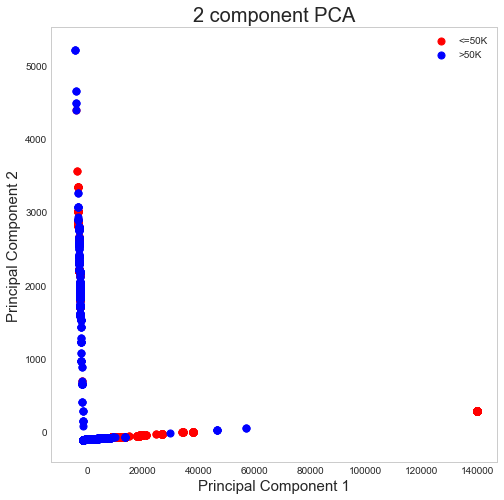

In [60]:
# Représentation de la projection selon la salaire
# Pour la création de graphiques

import matplotlib.pyplot as plt
import matplotlib.lines as plt_l
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = adult_data.income.unique()
labels_text = ['<=50K','>50K']
colors = {0:'r',1:'b'}
for label_i in labels:
    indicesToKeep = adult_data['income'] == label_i
    ax.scatter(adult_data.loc[indicesToKeep, 'principal component 1'], adult_data.loc[indicesToKeep, 'principal component 2']
               , c = colors[label_i], s = 50,label=labels_text[label_i])
ax.legend(labels_text)
ax.grid()


In [49]:
# part de la variance expliquée
pca2 = sk_de.PCA(n_components=5)
# Apprentissage
components = pca2.fit_transform(adult.drop(['income'],axis=1))
explained_var = [round(x*100,0) for x in pca2.explained_variance_ratio_]
explained_var = pd.DataFrame(explained_var,['compo_{}'.format(x) for x in range(1,6)])
explained_var.rename(columns={0:'variance_explained'},inplace=True)
explained_var

,variance_explained
compo_1,100.0
compo_2,0.0
compo_3,0.0
compo_4,0.0
compo_5,0.0


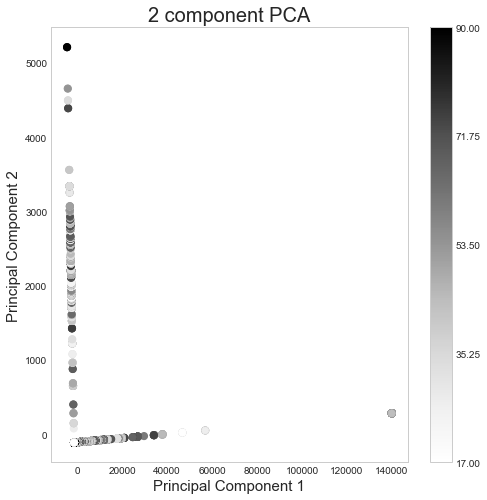

In [50]:
# Représentation selon une des variables d'entrée
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
points = ax.scatter(adult_data.loc[:,'principal component 1'], adult_data.loc[:, 'principal component 2']
               , c = adult_data.loc[:,'age'], s = 50)
v1 = np.linspace(adult_data.loc[:,'age'].min(),adult_data.loc[:,'age'].max(),5, endpoint=True)
cb = fig.colorbar(points,ticks=v1)

ax.grid()

In [51]:
import sklearn.cluster as sk_c
models_cluster = {}
results = {}
for n_cluster_i in range(2,6):
    models_cluster[n_cluster_i] = sk_c.KMeans(n_clusters=n_cluster_i)
    models_cluster[n_cluster_i].fit(adult_data.loc[:,['principal component 1', 'principal component 2']])
    category = pd.DataFrame(models_cluster[n_cluster_i].labels_,index=adult.index)
    category.rename(columns={0:'cluster'},inplace=True)
    results[n_cluster_i] = pd.merge(category,adult_data,how='left',left_index=True,right_index=True)
    

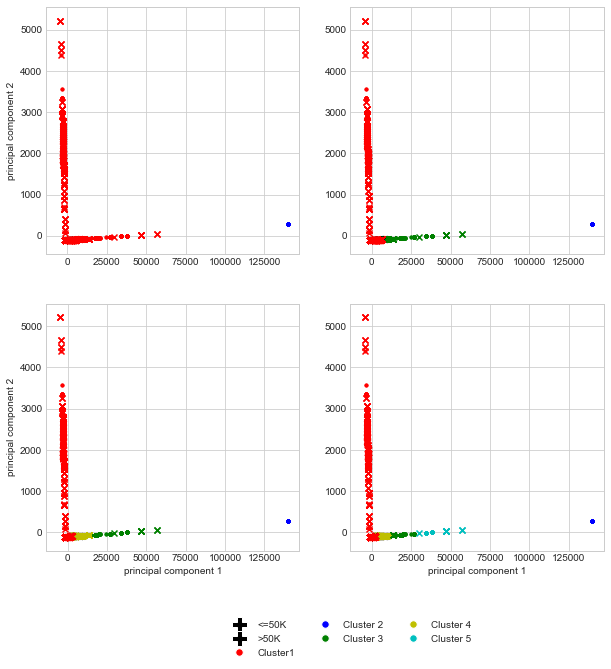

In [52]:
idx2Axes = {}
for i in range(5):
    idx2Axes[i] = (i//2,i%2)
fig,axes = plt.subplots(2,2,figsize=(10,10))
markers = {0:'.',1:'x'}
cluster_colors = {0:'r',1:'b',2:'g',3:'y',4:'c'}
labels_text = ['<=50K','>50K']
idx = 0
for n_cluster_i in results.keys():
    ax = axes[idx2Axes[idx]]
    if idx2Axes[idx][1] == 0:
        ax.set_ylabel('principal component 2')
    if idx2Axes[idx][0] == 1:
        ax.set_xlabel('principal component 1')  
    result_i = results[n_cluster_i]
    for label_i in result_i.income.unique():
        for cluster_i in result_i.cluster.unique():
            mask = ((result_i.income==label_i)&(result_i.cluster==cluster_i))
            ax.scatter(result_i.loc[mask,'principal component 1'],
                       result_i.loc[mask,'principal component 2'],
                      marker=markers[label_i],
                      color=cluster_colors[cluster_i],
                      label='label {} dans cluster {}'.format(labels_text[label_i],cluster_i))
    idx += 1
legend_elements = [plt_l.Line2D([0], [0], marker='P', color='w',markerfacecolor='k', label='<=50K', markersize=15),
                   plt_l.Line2D([0], [0], marker='P', color='w',markerfacecolor='k', label='>50K', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='r', label='Cluster1', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='b', label='Cluster 2', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='g', label='Cluster 3', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='y', label='Cluster 4', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='c', label='Cluster 5', markersize=15),]

ax.legend(handles=legend_elements,loc='lower center',bbox_to_anchor=(0,-0.45),ncol=3,borderaxespad=0,frameon=False,)

In [53]:
cluster_centers = pd.DataFrame(
    models_cluster[2].cluster_centers_,columns=['principal component 1','principal component 2'],
    index=['cluster 1','cluster_2'])
cluster_centers

,principal component 1,principal component 2
cluster 1,-686.785615,-1.386078
cluster_2,139957.405718,282.463615


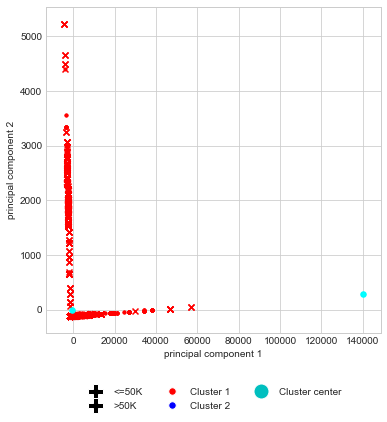

In [54]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
markers = {0:'.',1:'x'}
cluster_colors = {0:'r',1:'b',2:'g',3:'y',4:'c'}
labels_text = {0:'<=50K',1:'>50K'}
ax.set_ylabel('principal component 2')
ax.set_xlabel('principal component 1')  
result_i = results[2]
for label_i in result_i.income.unique():
    for cluster_i in result_i.cluster.unique():
        mask = ((result_i.income==label_i)&(result_i.cluster==cluster_i))
        ax.scatter(result_i.loc[mask,'principal component 1'],
                       result_i.loc[mask,'principal component 2'],
                      marker=markers[label_i],
                      color=cluster_colors[cluster_i],
                      label='label {} dans cluster {}'.format(labels_text[label_i],cluster_i))
ax.scatter(cluster_centers['principal component 1'],cluster_centers['principal component 2'],color='cyan',s=30)
legend_elements = [plt_l.Line2D([0], [0], marker='P', color='w',markerfacecolor='k', label='<=50K', markersize=15),
                   plt_l.Line2D([0], [0], marker='P', color='w',markerfacecolor='k', label='>50K', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='r', label='Cluster 1', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='b', label='Cluster 2', markersize=15),
                  plt_l.Line2D([0], [0], marker='.', color='w',markerfacecolor='c', label='Cluster center', markersize=30)]

ax.legend(handles=legend_elements,loc='lower center',bbox_to_anchor=(0.5,-0.25),ncol=3,borderaxespad=0,frameon=False,)

In [63]:
pip install prince

  Using cached https://files.pythonhosted.org/packages/94/6c/491a3fabfd1ce75e285a4fe4200fccde5d83664733541a3a74c0b02e77fb/prince-0.7.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [64]:
import prince

In [72]:
famd = prince.FAMD(
    n_components=2,
    n_item=3,
    copy=True,
    engine='auto',
    random_state=42)

famd = famd.fit(adult.drop(['marital.status','occupation','workclass','education','native.country','age1'],
                           axis='columns'))


TypeError: __init__() got an unexpected keyword argument 'n_item'